In [1]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


# Importing Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
from numpy import unique
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer,intercluster_distance
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, MeanShift, estimate_bandwidth
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import pairwise_distances
from sklearn import metrics

In [3]:
import warnings
warnings.filterwarnings("ignore")

# Reading Data

In [4]:
df=pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')

In [5]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [7]:
df.shape

(200, 5)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
df.describe(include='all')

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60.560000,50.200000
std,57.879185,NaN,13.969007,26.264721,25.823522
min,1.000000,NaN,18.000000,15.000000,1.000000
25%,50.750000,NaN,28.750000,41.500000,34.750000
50%,100.500000,NaN,36.000000,61.500000,50.000000
75%,150.250000,NaN,49.000000,78.000000,73.000000


In [10]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [11]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [12]:
df.nunique()

CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

In [13]:
df.CustomerID.is_unique

True

skewness =  0.3218425498619055


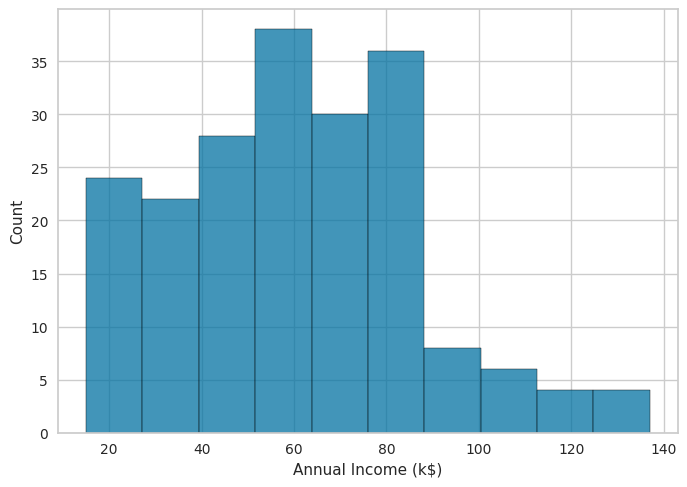

In [14]:
import seaborn as sns
print('skewness = ', df['Annual Income (k$)'].skew())
sns.histplot(df['Annual Income (k$)']);

skewness =  0.48556885096681657


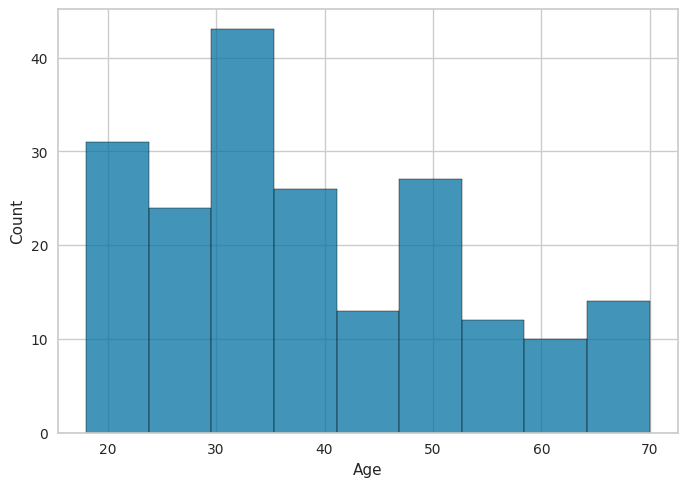

In [15]:
import seaborn as sns
print('skewness = ',df['Age'].skew())
sns.histplot(df['Age']);

**The skewness values for the Annual Income and Age columns are positive, indicating that both distributions are right-skewed, meaning that the tail on the right side (the positive direction) is longer or fatter than the left tail.**

In [16]:
df_encoded = pd.get_dummies(df, columns=['Gender'])

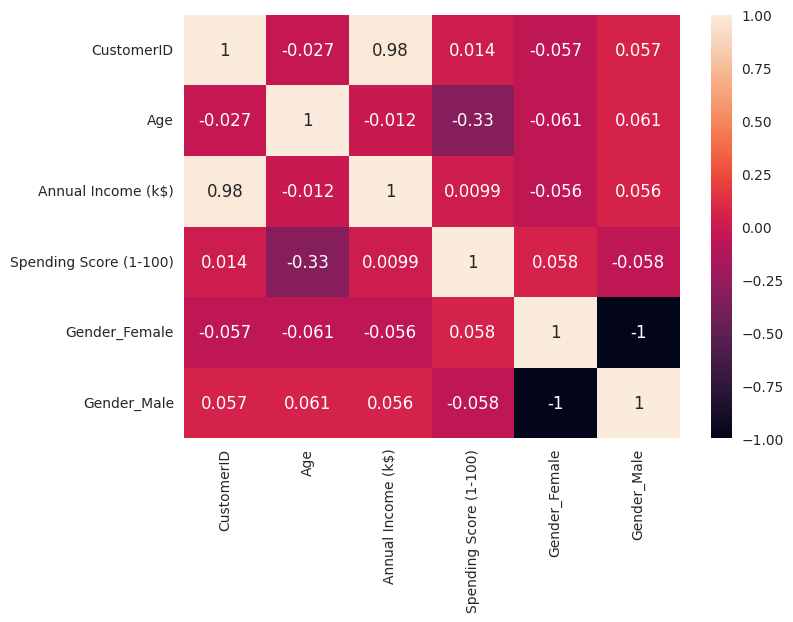

In [17]:
corr_df = df_encoded.corr()
sns.heatmap(corr_df, annot=True);

In [18]:
for x in range(len(df.columns)):
    corr_df.iloc[x,x] = 0
corr_df.idxmax()

CustomerID                    Annual Income (k$)
Age                                  Gender_Male
Annual Income (k$)                    CustomerID
Spending Score (1-100)             Gender_Female
Gender_Female             Spending Score (1-100)
Gender_Male                          Gender_Male
dtype: object

**As you can see below, there are the most correlation features printed together on each row using the idxmax() function.**

# Data Visualization

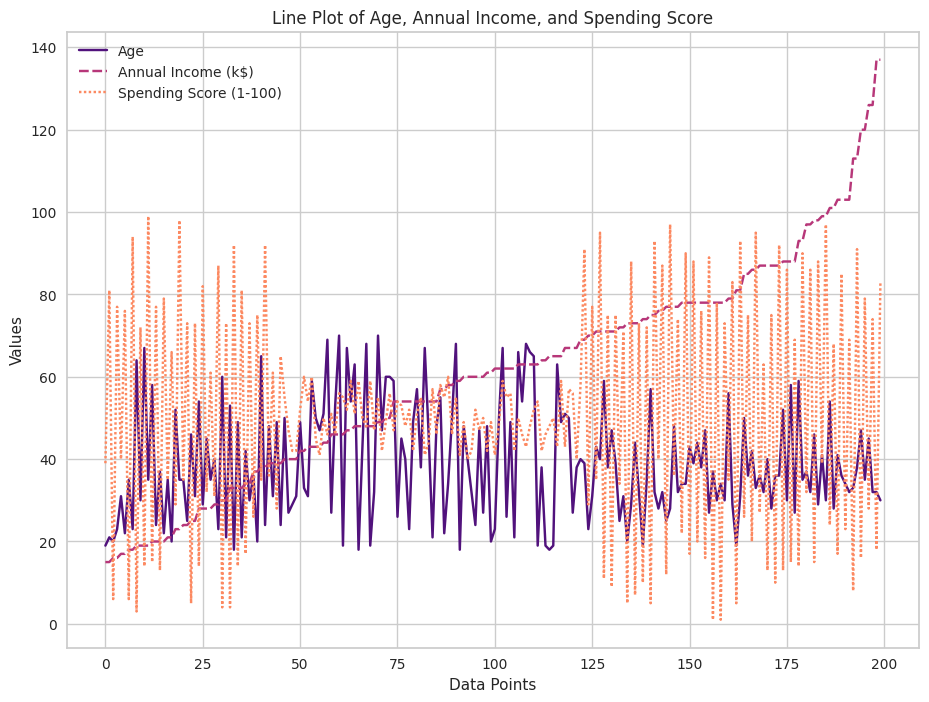

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(11, 8))
sns.lineplot(data=df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']], palette='magma')
plt.title('Line Plot of Age, Annual Income, and Spending Score')
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.show()

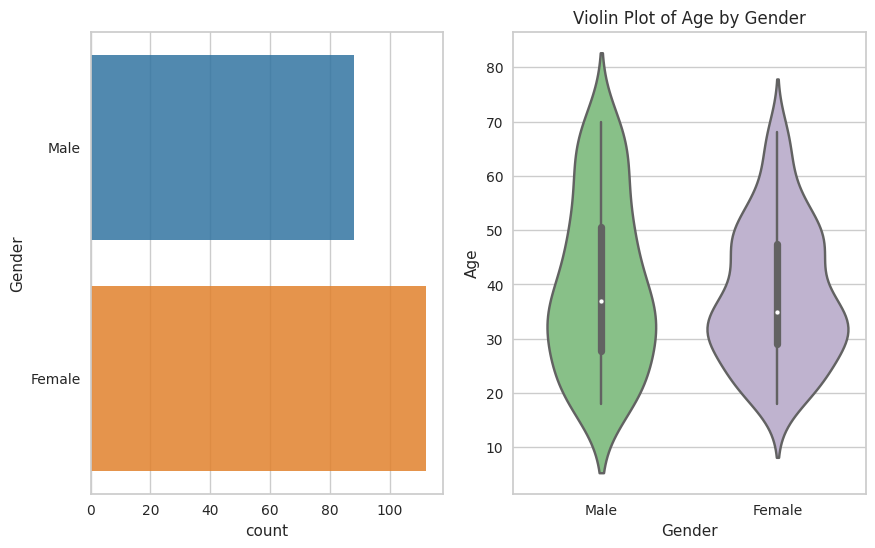

In [20]:
#To understand the different type of Categorical Values
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(10, 6))
sns.countplot(y=df['Gender'], alpha=0.85, ax=axes[0], palette='tab10')

sns.violinplot(data=df, x='Gender', y='Age', palette='Accent', ax=axes[1])
axes[1].set_ylabel('Age')
axes[1].set_xlabel('Gender')
axes[1].set_title('Violin Plot of Age by Gender')

plt.show()

<Figure size 1500x900 with 0 Axes>

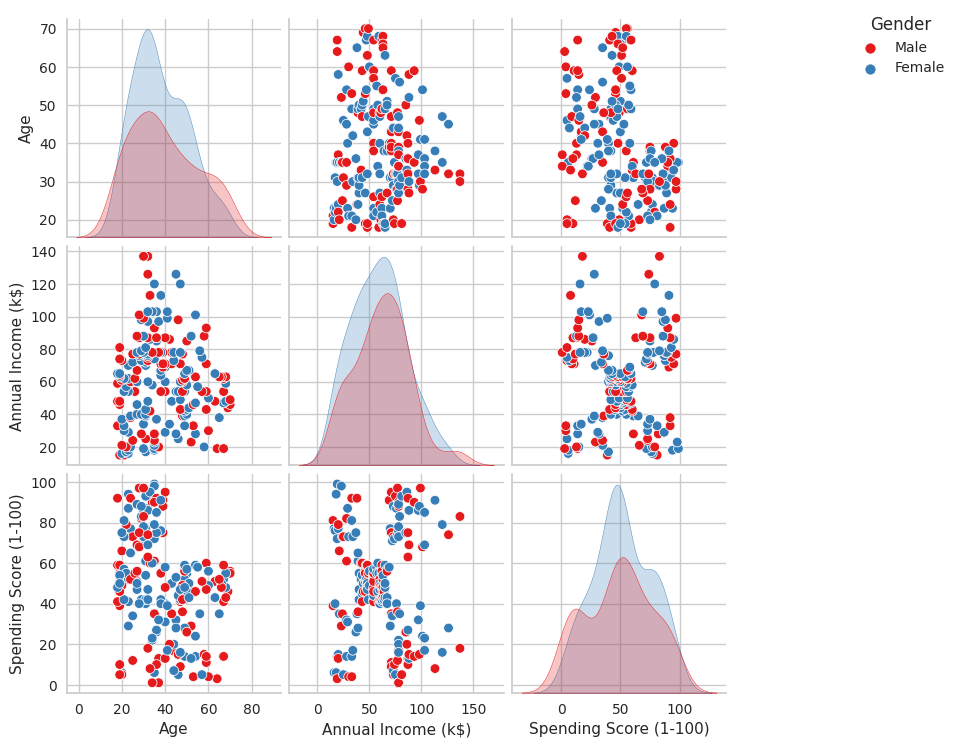

In [21]:
#Relationship between Age, Annual Income & Spending Score
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 9))
ax = sns.pairplot(data=df, vars=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], hue='Gender',
                 palette='Set1', diag_kind='kde', kind='scatter')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

<Axes: >

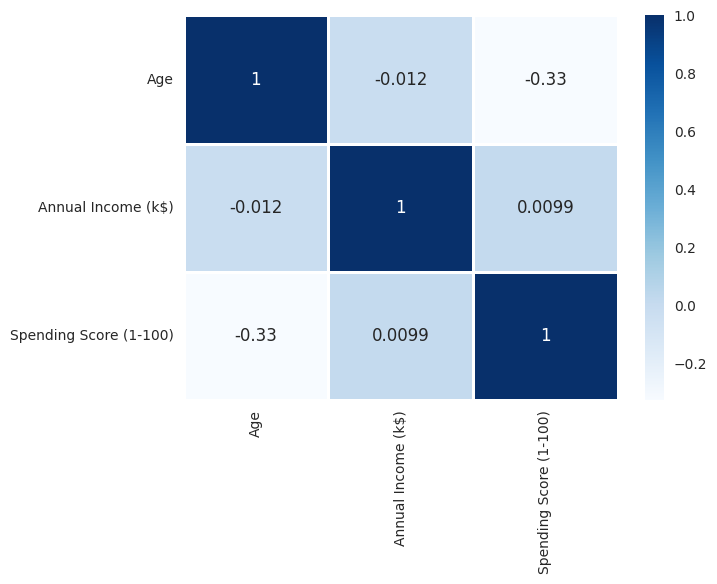

In [22]:
#Understanding the Correlation between features
plt.figure(figsize=(7, 5))
df1=df[['Age','Annual Income (k$)','Spending Score (1-100)']]
sns.heatmap(df1.corr(), annot=True,linewidth=.8, cmap="Blues")

There is no definite relationships between these 3 feature groups. Adding to that the Age has negative correlation with other features.

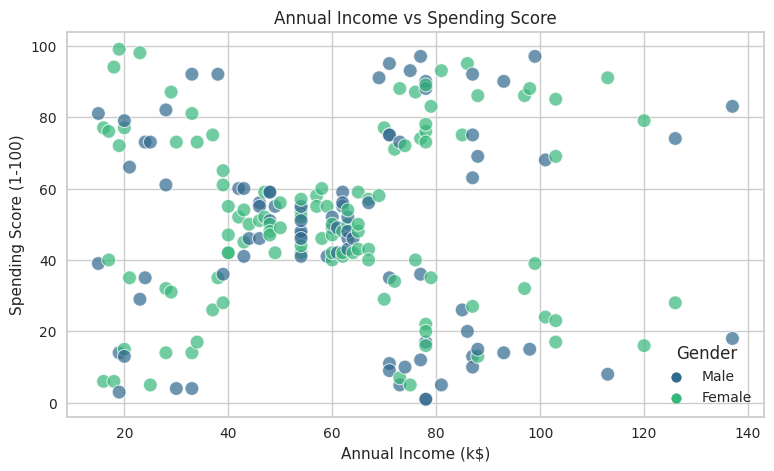

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 5))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', palette='viridis', s=100, alpha=0.7)
plt.title('Annual Income vs Spending Score')
plt.show()

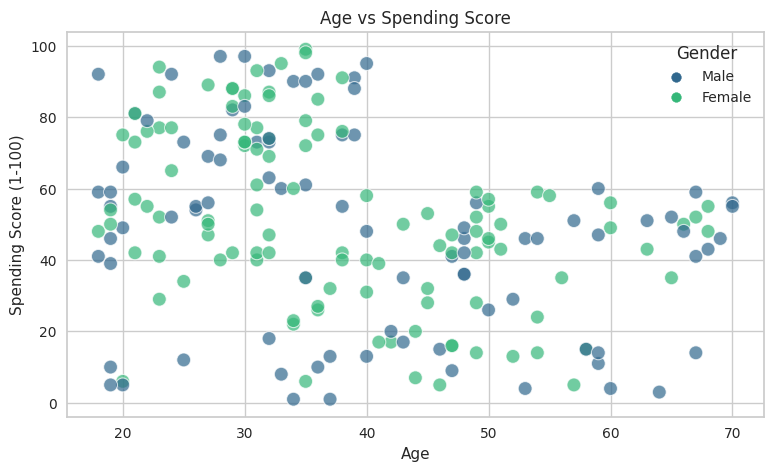

In [24]:
plt.figure(figsize=(9,5))
sns.scatterplot(df,x='Age',y='Spending Score (1-100)',hue='Gender',palette='viridis',s=100,alpha=0.7)

plt.title('Age vs Spending Score')
plt.show()

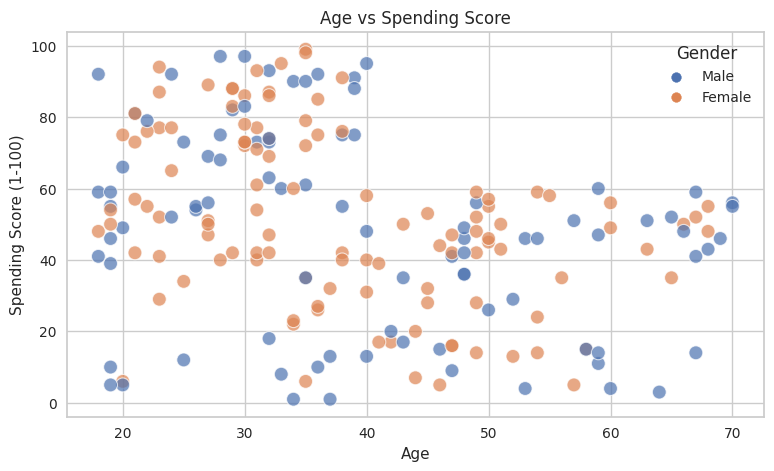

In [25]:
plt.figure(figsize=(9,5))
sns.scatterplot(df,x='Age',y='Spending Score (1-100)',hue='Gender',palette='deep',s=100,alpha=0.7)

plt.title('Age vs Spending Score')
plt.show()

# Clustering

In [26]:
X1=df[['Age','Annual Income (k$)','Spending Score (1-100)']]

# 1) K-means

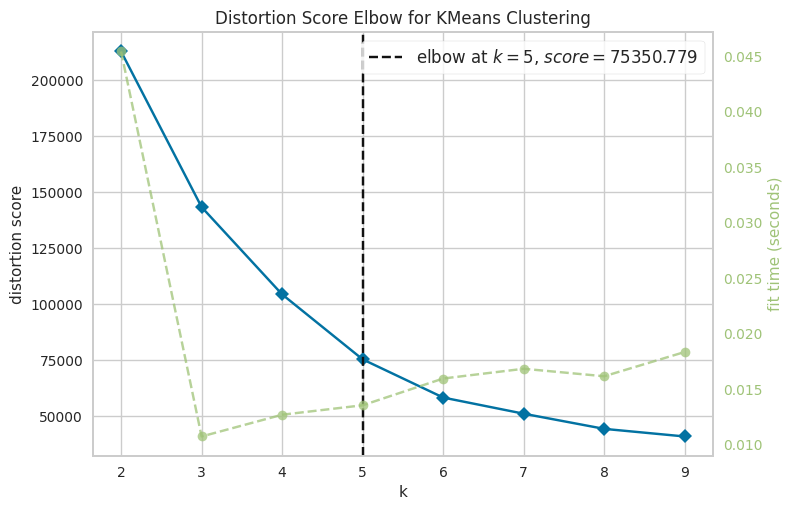

In [27]:
visualizer = KElbowVisualizer(KMeans(),k=(2,10))
visualizer.fit(X1) 
visualizer.poof()
plt.show()

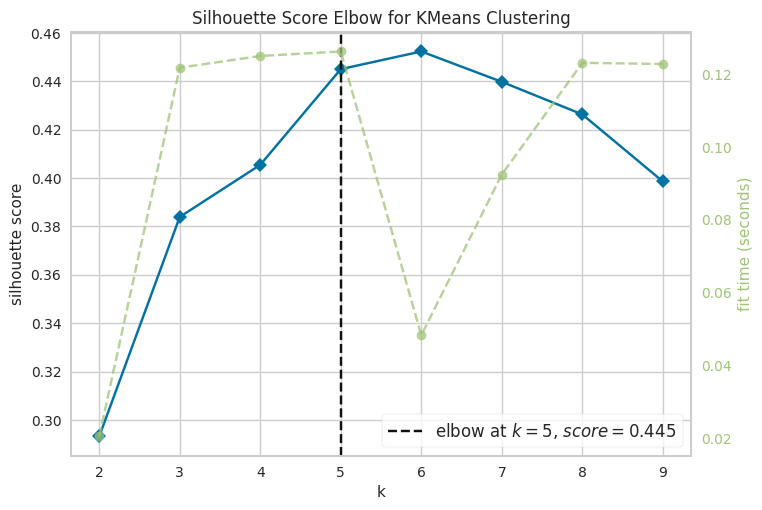

In [28]:
visualizer = KElbowVisualizer(KMeans(random_state=23),k=(2,10),metric='silhouette')
visualizer.fit(X1) 
visualizer.show()
plt.show()

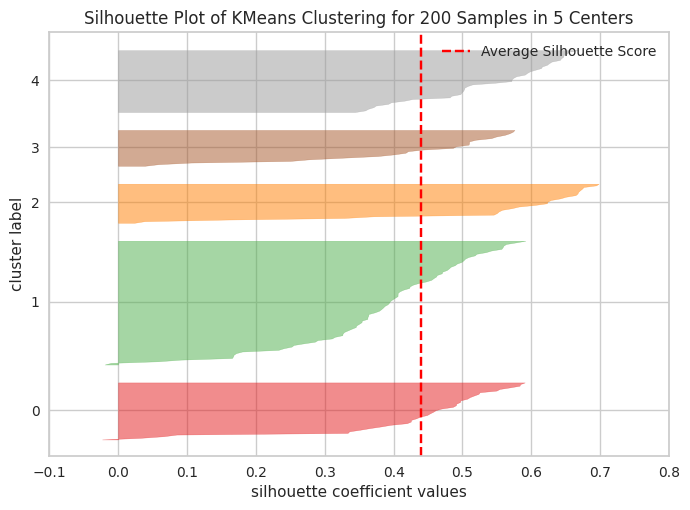

In [29]:
#We obtain ideal K value as 5 from the above methods. We now check its average Silhouette Score for K=5
sil_visualizer = SilhouetteVisualizer(KMeans(5))
sil_visualizer.fit(X1)
sil_visualizer.show()
plt.show()

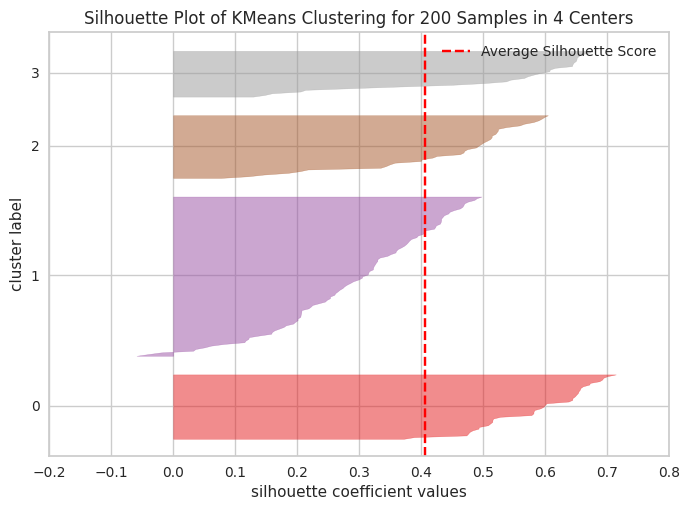

In [30]:
#k-mean = 4
sil_visualizer = SilhouetteVisualizer(KMeans(4))
sil_visualizer.fit(X1)
sil_visualizer.show()
plt.show()

**We observe that there in decrease in Average Silhouette Score value when K=4 which is non ideal. Thus we will train our model with K=5**

In [31]:
#Now we know that optimal k value is 5
k=5
K_means=KMeans(init="k-means++",n_clusters=k)
K_means.fit(X1)

KMeans(n_clusters=5)

In [32]:
df['KM_Cluster']=K_means.labels_
KM_centres=K_means.cluster_centers_

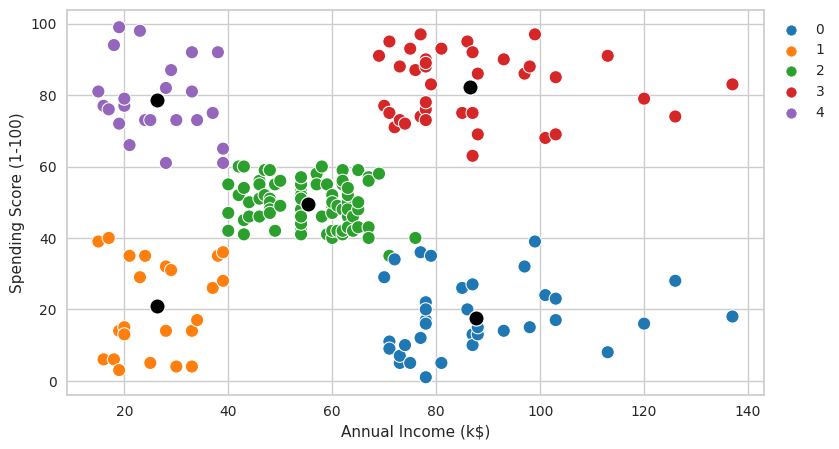

In [33]:
plt.figure(figsize=(9,5))
ax=sns.scatterplot(data=df,x='Annual Income (k$)', y='Spending Score (1-100)',hue='KM_Cluster',palette='tab10',s=90)
ax=sns.scatterplot(x=KM_centres[:,1],y=KM_centres[:,2],s=120,color='black')
sns.move_legend(ax, "upper left",bbox_to_anchor=(1, 1))
plt.show()

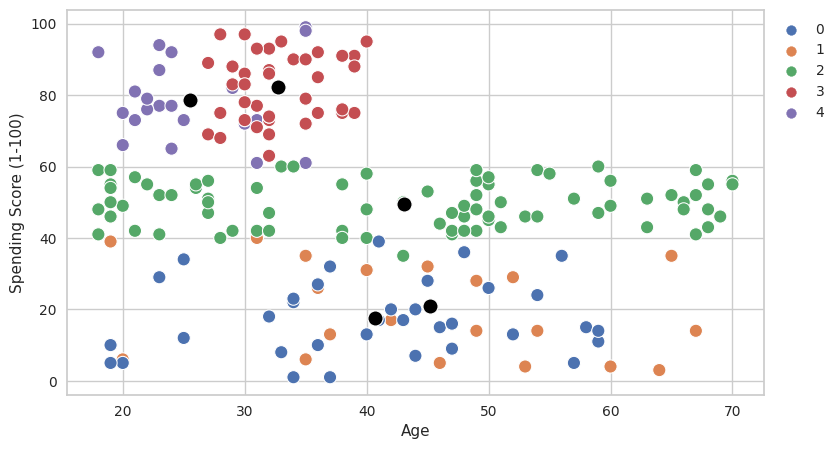

In [34]:
#We obtain well segmented clusters for the features: Annual Income vs Spending Score
plt.figure(figsize=(9,5))
ax=sns.scatterplot(data=df,x='Age', y='Spending Score (1-100)',hue='KM_Cluster',palette='deep',s=90)
ax=sns.scatterplot(x=KM_centres[:,0],y=KM_centres[:,2],s=120,color='black')
sns.move_legend(ax, "upper left",bbox_to_anchor=(1, 1))
plt.show()

**We have obtained vaguely segmented clusters for the features "Age vs Spending Score." Therefore, we will discard this feature for further clustering.**

# 2. Hierarchical  Clustering

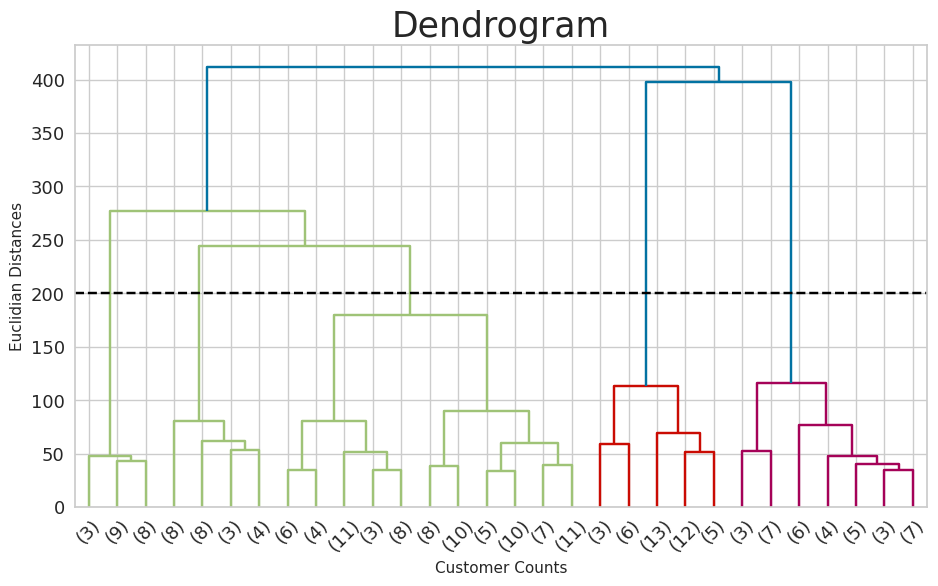

In [35]:
#creating a Dendrogram to obtain the required cluster count
plt.figure(figsize=(11, 6))
dendo = dendrogram(linkage(X1, method='ward'),leaf_font_size=5,truncate_mode = 'lastp') 
plt.axhline(y=200 , color='black',linestyle = '--')
plt.title('Dendrogram', fontsize=25) 
plt.xlabel('Customer Counts')
plt.ylabel('Euclidian Distances')
plt.yticks(fontsize=13)  
plt.xticks(fontsize=13) 
plt.show() 


In [36]:
agc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
agc.fit(X1)
df['HC_Cluster']=agc.labels_

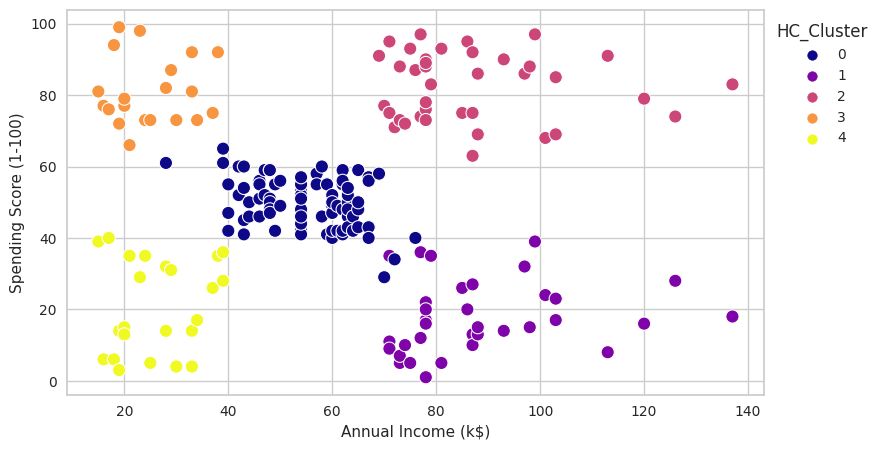

In [37]:
plt.figure(figsize=(9,5))
ax=sns.scatterplot(data=df,x='Annual Income (k$)', y='Spending Score (1-100)',hue='HC_Cluster',palette='plasma',s=90)
sns.move_legend(ax, "upper left",bbox_to_anchor=(1, 1))
plt.show()

# 3. DBSCAN

In [38]:
#Determining suitable eps and min_sample values
db = DBSCAN(eps=10,min_samples=6) 
db.fit(X1) 
tlabels = db.labels_
tlabels

array([-1,  0, -1,  0, -1,  0, -1, -1, -1,  0, -1, -1, -1,  0, -1,  0, -1,
        0, -1, -1, -1,  0, -1,  0, -1,  0, -1, -1, -1, -1, -1,  0, -1, -1,
       -1, -1, -1,  0, -1, -1, -1, -1,  1,  1, -1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  2, -1,  2, -1,  2, -1,  2, -1,  2, -1,  2, -1,  2,
       -1,  2, -1,  2, -1,  2, -1,  2, -1,  2, -1,  2, -1,  2, -1,  2, -1,
        2, -1,  2, -1,  2, -1,  2, -1,  2, -1,  2, -1,  2, -1,  2, -1, -1,
       -1,  2, -1,  2, -1,  2, -1, -1, -1,  2, -1,  2, -1,  2, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

**We obtain a large amount of -1 values which corresponds to Outliers. Thus we need to adjust eps and min_sample values such that we obtain more Cluster labels than Outliers.**

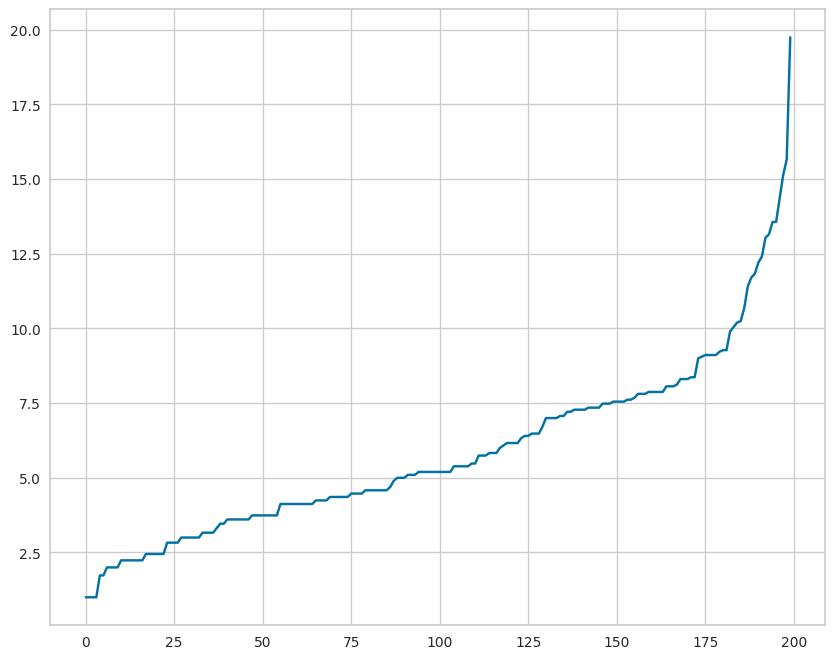

In [39]:
ep,count = NearestNeighbors(n_neighbors=20).fit(X1).kneighbors(X1) #arbitrary n_neighbors value
ep = np.sort(ep, axis=0)
plt.figure(figsize=(10,8))
plt.plot(ep[:,1])
plt.show()

**The curve gradually increases for an epsilon (eps) value of 9, covering more than 87% of our data samples. Subsequently, the curve becomes more stagnant. As a result, we will examine the epsilon (eps) value upto 13.**

In [40]:
min_samples = range(2,10)
eps = np.arange(9,13, 0.25)
output = []
for ms in min_samples:
    for ep in eps:
        labels = DBSCAN(eps = ep,min_samples=ms).fit(X1).labels_
        score = metrics.silhouette_score(X1, labels)
        output.append((ms, ep, score))
min_samples, eps, score = sorted(output, key=lambda x:x[-1])[-1]
print(f"Best silhouette_score: {score}")
print(f"min_samples: {min_samples}")
print(f"eps: {eps}")    

Best silhouette_score: 0.2555628510249617
min_samples: 4
eps: 12.5


In [41]:
db = DBSCAN(eps=12.5,min_samples=4)
db.fit(X1) 
labels = db.labels_
df['DB_Cluster']=labels
labels

array([ 0,  0, -1,  0,  0,  0, -1, -1,  1,  0, -1, -1,  1,  0, -1,  0,  0,
        0,  0, -1,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  1,  0,  1,  0,
        1,  0,  1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  2,  0,  2,  0,  2,  3,  2,  3,  2,  0,  2,  4,  2,
        3,  2,  4,  2,  3,  2,  0,  2,  4,  2,  0,  2,  3,  2,  3,  2,  3,
        2,  3,  2,  3,  2, -1,  2,  3,  2,  4,  2,  3,  2,  3,  2,  3,  2,
        3,  2,  3,  2,  3,  2,  3,  2,  3,  2,  3,  2,  3,  2,  3,  2,  3,
       -1,  3,  2,  3, -1, -1,  2, -1, -1, -1, -1, -1, -1])

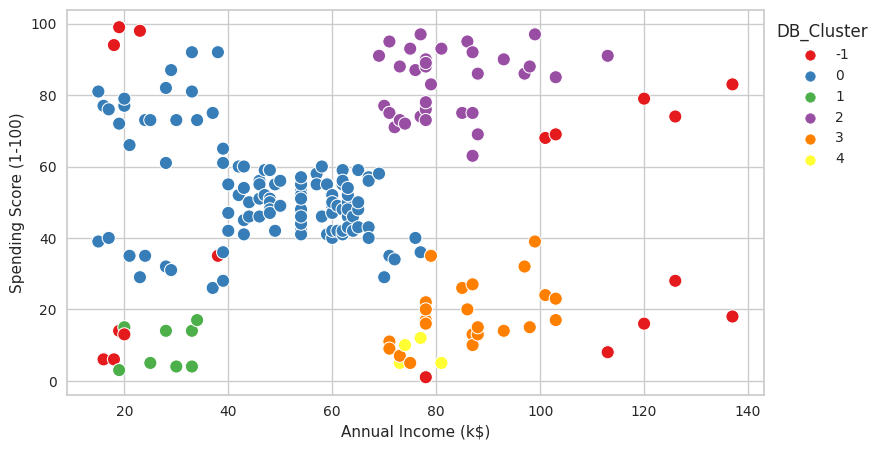

In [42]:
plt.figure(figsize=(9,5))
ax=sns.scatterplot(data=df,x='Annual Income (k$)', y='Spending Score (1-100)',hue='DB_Cluster',palette='Set1',s=90)
sns.move_legend(ax, "upper left",bbox_to_anchor=(1, 1))
plt.show()

**Red points indicate Outliers**

# 4. Mean Shift

**Selecting optimal Bandwidth(radius) value using estimate_bandwidth() function**

In [43]:
estimate_bandwidth(X1, quantile=0.1)

22.173844534734847

In [44]:
mean_shift = MeanShift(bandwidth=22.173844534734847)
mean_shift.fit(X1)

MeanShift(bandwidth=22.173844534734847)

In [45]:
yhat_ms = mean_shift.predict(X1)
clusters_ms = unique(yhat_ms)
print("Clusters of Mean Shift:", clusters_ms)

Clusters of Mean Shift: [0 1 2 3 4]


In [46]:
labels_ms =mean_shift.labels_ 
df['MS_Cluster']=labels_ms
centroids_ms = mean_shift.cluster_centers_

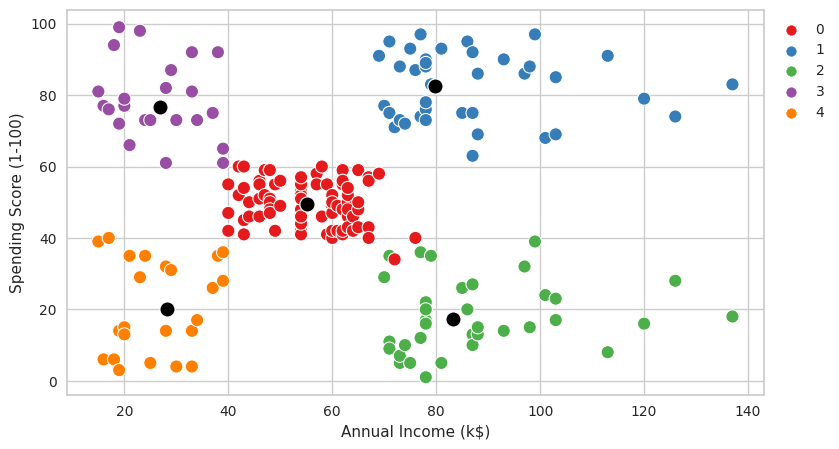

In [47]:
plt.figure(figsize=(9,5))  
ax=sns.scatterplot(data=df,x='Annual Income (k$)', y='Spending Score (1-100)',hue='MS_Cluster',palette='Set1',s=90)
ax=sns.scatterplot(x=centroids_ms[:,1],y=centroids_ms[:,2],s=120,color='black')
sns.move_legend(ax, "upper left",bbox_to_anchor=(1, 1))
plt.show()

# Model Evaluation metrics

In [48]:
silhoutte_scores=[metrics.silhouette_score(X1,K_means.labels_),metrics.silhouette_score(X1,agc.labels_),
                  metrics.silhouette_score(X1,db.labels_),metrics.silhouette_score(X1,mean_shift.labels_)]

davies_bouldin_scores=[metrics.davies_bouldin_score(X1,K_means.labels_),metrics.davies_bouldin_score(X1,agc.labels_),
                  metrics.davies_bouldin_score(X1,db.labels_),metrics.davies_bouldin_score(X1,mean_shift.labels_)]

In [49]:
score_df={'Algorithm':["K-means", "Heirarchical", "DBSCAN", "Mean-Shift"],'Silhouette Score':silhoutte_scores,
          'Davies-Bouldin Scores':davies_bouldin_scores}
score_df=pd.DataFrame.from_dict(score_df)
score_df

,Algorithm,Silhouette Score,Davies-Bouldin Scores
0,K-means,0.444286,0.821878
1,Heirarchical,0.440189,0.821672
2,DBSCAN,0.255563,2.236800
3,Mean-Shift,0.443280,0.824391


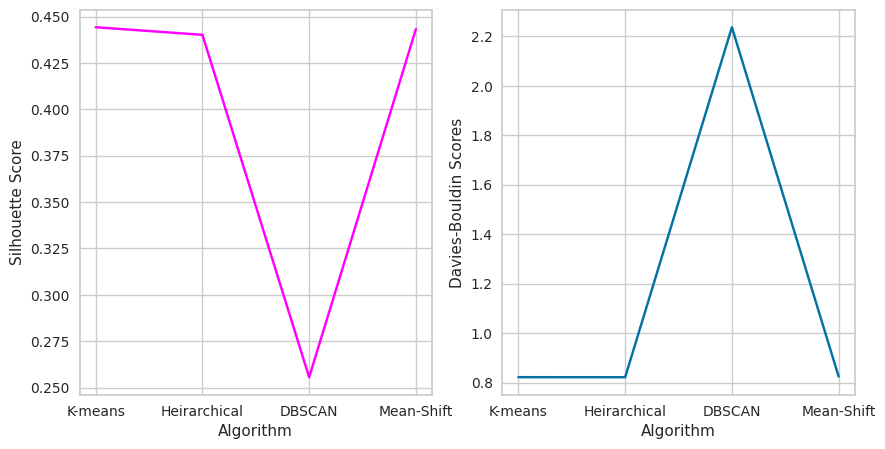

In [50]:
fig,axes = plt.subplots(1, 2, figsize=(10,5))
sns.lineplot(data=score_df,x='Algorithm',y='Silhouette Score',color='Magenta',ax=axes[0])
sns.lineplot(data=score_df,x='Algorithm',y='Davies-Bouldin Scores',ax=axes[1])
plt.show()